In [ ]:
# pip install spacy
# pip install wordcloud
# python -m spacy download en_core_web_sm

In [97]:
import pandas as pd
import numpy as np
import spacy
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import time

In [16]:
# Details of initializing an object nlp of Language class - https://spacy.io/usage/processing-pipelines
nlp = spacy.load("en_core_web_sm")

## Read in the sample data 
Kaggle source - https://www.kaggle.com/therohk/india-headlines-news-dataset

In [8]:
# Read in the sample data from the zip file 
news_df = pd.read_csv('C:/Users/ATiwari/Downloads/archive.zip')
# Format publish date and create a 'year' column 
news_df['publish_date_edt'] = pd.to_datetime(news_df['publish_date'], format='%Y%m%d')
news_df['year'] = news_df['publish_date_edt'].dt.year

news_df.head(2)

,publish_date,headline_category,headline_text,publish_date_edt,year
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,2001-01-02,2001
1,20010102,unknown,Fissures in Hurriyat over Pak visit,2001-01-02,2001


In [22]:
# There are 182609 headline texts since the year 2019. Using these to test entity labeling 
news_df.loc[news_df['year']>2019,'headline_text'].shape

(182609,)

In [98]:
# Label entities mentioned in the news since 2019
start = time.process_time()

headlines_list = news_df.loc[news_df['year']>2019,'headline_text'].tolist()
org_c = []
GPE_c = []
person_c = []

for doc in nlp.pipe(headlines_list, batch_size=1000):
    for ent in doc.ents:
        if ent.label_=='GPE':
            GPE_c.append(ent.text)
        elif ent.label_=="ORG":
            ORG_c.append(ent.text)
        elif ent.label_=="PERSON":
            person_c.append(ent.text)    
               
print('Time taken to process - ', time.process_time() - start)

Time taken to process -  655.390625


In [100]:
print('Frequency of entites labeled as \'Person\' - \n')
print(pd.Series(person_c).value_counts().sort_values(ascending=False)[:10])

Frequency of entites labeled as 'Person' - 

Tamil Nadu      2010
Goa              863
Kerala           630
Covid            500
Jaipur           459
Kolhapur         324
Nitish Kumar     278
Gujarat          263
Kota             245
Chennai          241
dtype: int64


In [101]:
print('Frequency of entites labeled as geo political entity or \'GPE\' - \n')
print(pd.Series(GPE_c).value_counts().sort_values(ascending=False)[:10])

Frequency of entites labeled as geo political entity or 'GPE' - 

Delhi        5024
Telangana    2575
Bihar        2066
India        1653
Gujarat      1566
Mumbai       1416
BJP          1219
Kerala       1125
US            757
Kolkata       644
dtype: int64


**Looking at the results of the entity labeling above, it seems that the geo political entity recognition has worked far better than the person detection. This may be because the entities are deduced based on their position in a sentence and the dataset here is a set of phrases, hardly complete sentences.**

**More explorations are required here to identify a fix for this.**

## Word Cloud

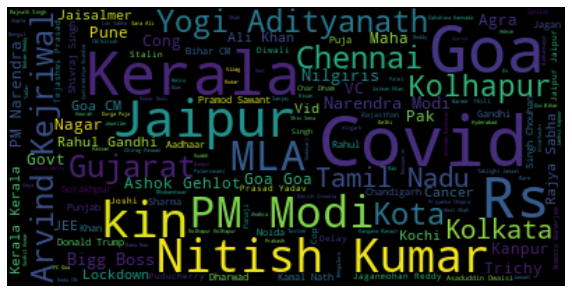

In [116]:
# Generate a word cloud image:

# Clearly, the headline text is not efficiently labeled for 'Person' entity. 
# Removing Tamil Nadu from the persons text as it forms a large chunk of the identified entites.
person_c = [word  for word in person_c if word!='Tamil Nadu']

wordcloud_p = WordCloud(max_font_size=50, max_words=1000, background_color="black",)\
                    .generate(' '.join(person_c))

plt.figure(figsize=(10,6))
plt.imshow(wordcloud_p, interpolation='bilinear')
plt.axis("off")
plt.show()

**The word cloud makes it clear that Mr Modi, Mr Aditynath and Mr Nitish Kumar are mentioned in headlines far more often than Mr Gandhi.**

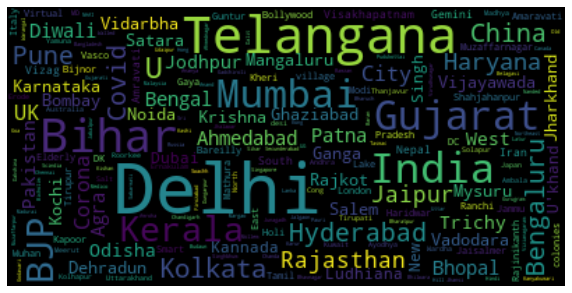

In [145]:
# Generate a word cloud image:

wordcloud_g = WordCloud(collocations = False, max_font_size=50, max_words=500, background_color="black",)\
                    .generate(' '.join(GPE_c))

plt.figure(figsize=(10,6))
plt.imshow(wordcloud_g, interpolation='bilinear')
plt.axis("off")
plt.show()

**Delhi has been rocked with the deadly second wave of Covid-19, as well as has been the site of extensive farmer protests over the past couple of years. Being the national capital, it is no surprise that it is mentioned in the headlines more than any other city.**